In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
marketing_data = pd.read_excel('/Users/joluhergo/Desktop/Ironhack/labs/lab-customer-r3/marketing_customer_analysis.xlsx')

# Show DataFrame info

### Shape

In [2]:
display(marketing_data.head(5))
print("Shape: ",marketing_data.shape)
print("Columns: ", marketing_data.columns)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Shape:  (9134, 24)
Columns:  Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')


# Describe DataFrame

In [3]:
#data type:
marketing_data.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [4]:
#Categorical data:
marketing_data.select_dtypes(include='object').head(3)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize


In [5]:
marketing_data.describe(include='object').T

,count,unique,top,freq
Customer,9134,9134,BF54215,1
State,9134,5,California,3150
Response,9134,2,No,7826
Coverage,9134,3,Basic,5568
Education,9134,5,Bachelor,2748
Effective To Date,9134,59,1/10/11,195
EmploymentStatus,9134,5,Employed,5698
Gender,9134,2,F,4658
Location Code,9134,3,Suburban,5779
Marital Status,9134,3,Married,5298


In [6]:
#Description of the numerical data:
sumary = marketing_data.describe().T
sumary
# The next table shows, for each column: mean, standard deviation, minimun value, Q1, median, Q3 and maximun value.

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
# We can also see the correlation for each pair of values:
correlations_matrix = marketing_data.corr()
correlations_matrix

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


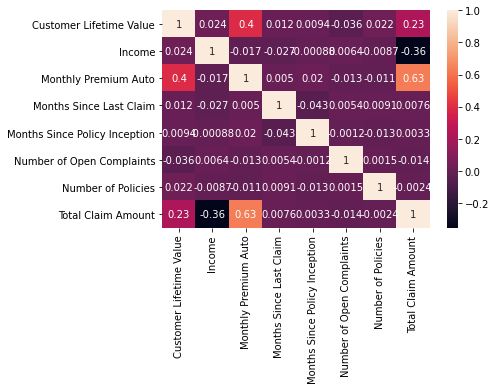

In [8]:
#And show it in a heatmap
sns.heatmap(correlations_matrix, annot=True)
plt.show()

# Show a plot of the total number of responses.

In [9]:
marketing_data["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [10]:
response_data = marketing_data["Response"]

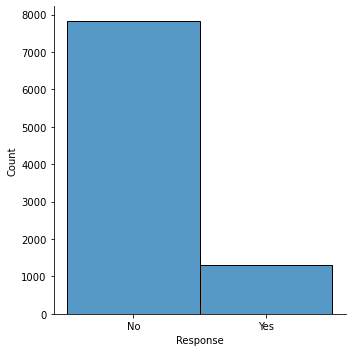

In [11]:
sns.displot(response_data)
plt.show()

# Show a plot of the response rate by the sales channel

In [12]:
sales_channel_data = marketing_data["Sales Channel"]
sales_channel_data

0             Agent
1             Agent
2             Agent
3       Call Center
4             Agent
           ...     
9129            Web
9130         Branch
9131         Branch
9132         Branch
9133    Call Center
Name: Sales Channel, Length: 9134, dtype: object

In [13]:
sales_channel_data.unique()

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [14]:
#Note: Another way that I know its not the best but it was the first I thought
a = 0
c = 0
w = 0
b = 0
n = 0
i= 0
while i < len(marketing_data):
    if (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Agent"):
        a = a + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Call Center"):
        c = c + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Web"):
        w = w + 1
    elif (marketing_data["Response"][i] == "Yes") & (marketing_data["Sales Channel"][i] == "Branch"):
        b = b +1
    elif (marketing_data["Response"][i] == "No"):
        n = n +1
    i= i+1
response_by_sales = {"Agent": a, "Call Center": c,"Web":w,"Branch": b}
response_by_sales


{'Agent': 666, 'Call Center': 192, 'Web': 156, 'Branch': 294}

In [15]:
#checking the results are right
marketing_data["Response"].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

Text(0, 0.5, 'Response')

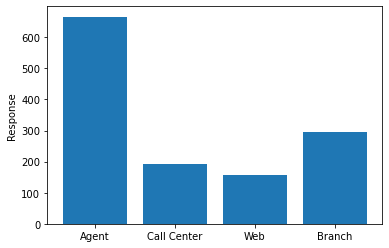

In [16]:
keys_response_by_sales = response_by_sales.keys()
val_response_by_sales = response_by_sales.values()

plt.bar(keys_response_by_sales, val_response_by_sales)
plt.ylabel('Response')

# Show a plot of the response rate by the total claim amount.

In [17]:
response_by_claim = marketing_data[["Response","Total Claim Amount"]]
response_by_claim

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


In [18]:
response_by_claim['boolean_value'] = response_by_claim['Response'] == "Yes"
response_by_claim

<ipython-input-18-0e484395505b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_by_claim['boolean_value'] = response_by_claim['Response'] == "Yes"


,Response,Total Claim Amount,boolean_value
0,No,384.811147,False
1,No,1131.464935,False
2,No,566.472247,False
3,No,529.881344,False
4,No,138.130879,False
...,...,...,...
9129,No,198.234764,False
9130,Yes,379.200000,True
9131,No,790.784983,False
9132,No,691.200000,False


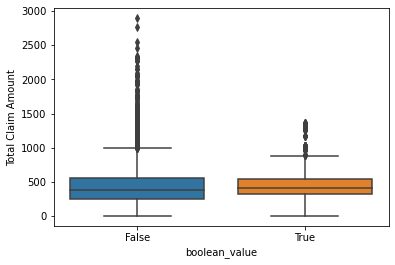

In [19]:
sns.boxplot(x="boolean_value", y="Total Claim Amount", data=response_by_claim)
plt.show()
#This box plot shows a lot of information. We can see where are the 50% of the values wich are between the 25% and 75% of the analysed data

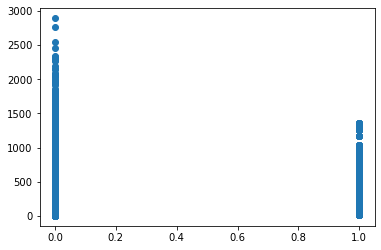

In [20]:
plt.scatter(x=response_by_claim['boolean_value'], y=response_by_claim['Total Claim Amount'])
plt.show()
#This one gives us less information and its less clear,  0  on x axis corresponds with the response "No" and ones on x axis corresponds with response "Yes"

# Show a plot of the response rate by income

In [24]:
response_by_income = marketing_data[["Response","Income"]]
response_by_income['boolean_value'] = response_by_claim['Response'] == "Yes"

<ipython-input-24-1cd9a7586296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  response_by_income['boolean_value'] = response_by_claim['Response'] == "Yes"


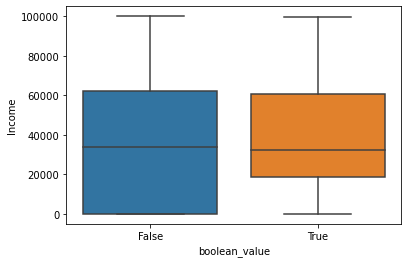

In [25]:
sns.boxplot(x="boolean_value", y="Income", data=response_by_income)
plt.show()
#we can see that most of the people who answered are around the value of 30000